# Data Analytics - I

Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). 
The Boston Housing dataset contains information about various houses in Boston through different parameters. 
There are 506 samples and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.

In [10]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np 
import pandas as pd 

import os
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/Users/abhimsound/Desktop/DSBDA FINAL/A7/HousingData.csv', header=None, delimiter=r"\s+", names=column_names)
data.head(5)

CRIM  ZN  INDUS  CHAS  NOX  \
0  CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRA... NaN    NaN   NaN  NaN   
1  0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,... NaN    NaN   NaN  NaN   
2  0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242... NaN    NaN   NaN  NaN   
3  0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242... NaN    NaN   NaN  NaN   
4  0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222... NaN    NaN   NaN  NaN   

   RM  AGE  DIS  RAD  TAX  PTRATIO   B  LSTAT  MEDV  
0 NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
1 NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
2 NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
3 NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
4 NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN

In [11]:
data

CRIM  ZN  INDUS  CHAS  NOX  \
0    CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRA... NaN    NaN   NaN  NaN   
1    0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,... NaN    NaN   NaN  NaN   
2    0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242... NaN    NaN   NaN  NaN   
3    0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242... NaN    NaN   NaN  NaN   
4    0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222... NaN    NaN   NaN  NaN   
..                                                 ...  ..    ...   ...  ...   
502  0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,27... NaN    NaN   NaN  NaN   
503  0.04527,0,11.93,0,0.573,6.12,76.7,2.2875,1,273... NaN    NaN   NaN  NaN   
504  0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,... NaN    NaN   NaN  NaN   
505  0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,27... NaN    NaN   NaN  NaN   
506  0.04741,0,11.93,0,0.573,6.03,NA,2.505,1,273,21... NaN    NaN   NaN  NaN   

     RM  AGE  DIS  RAD  TAX  PTRATIO   B  LSTAT  MEDV  
0   NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
1   NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
2   NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
3   NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
4   NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
..   ..  ...  ...  ...  ...      ...  ..    ...   ...  
502 NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
503 NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
504 NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
505 NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
506 NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  

[507 rows x 14 columns]

In [7]:
print(np.shape(data))

(507, 14)


In [8]:
print(data.describe().transpose())

         count  mean  std  min  25%  50%  75%  max
ZN         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
INDUS      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
CHAS       0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
NOX        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
RM         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
AGE        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
DIS        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
RAD        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
TAX        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
PTRATIO    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
B          0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
LSTAT      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
MEDV       0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN


TypeError: Vertical orientation requires numeric `y` variable.

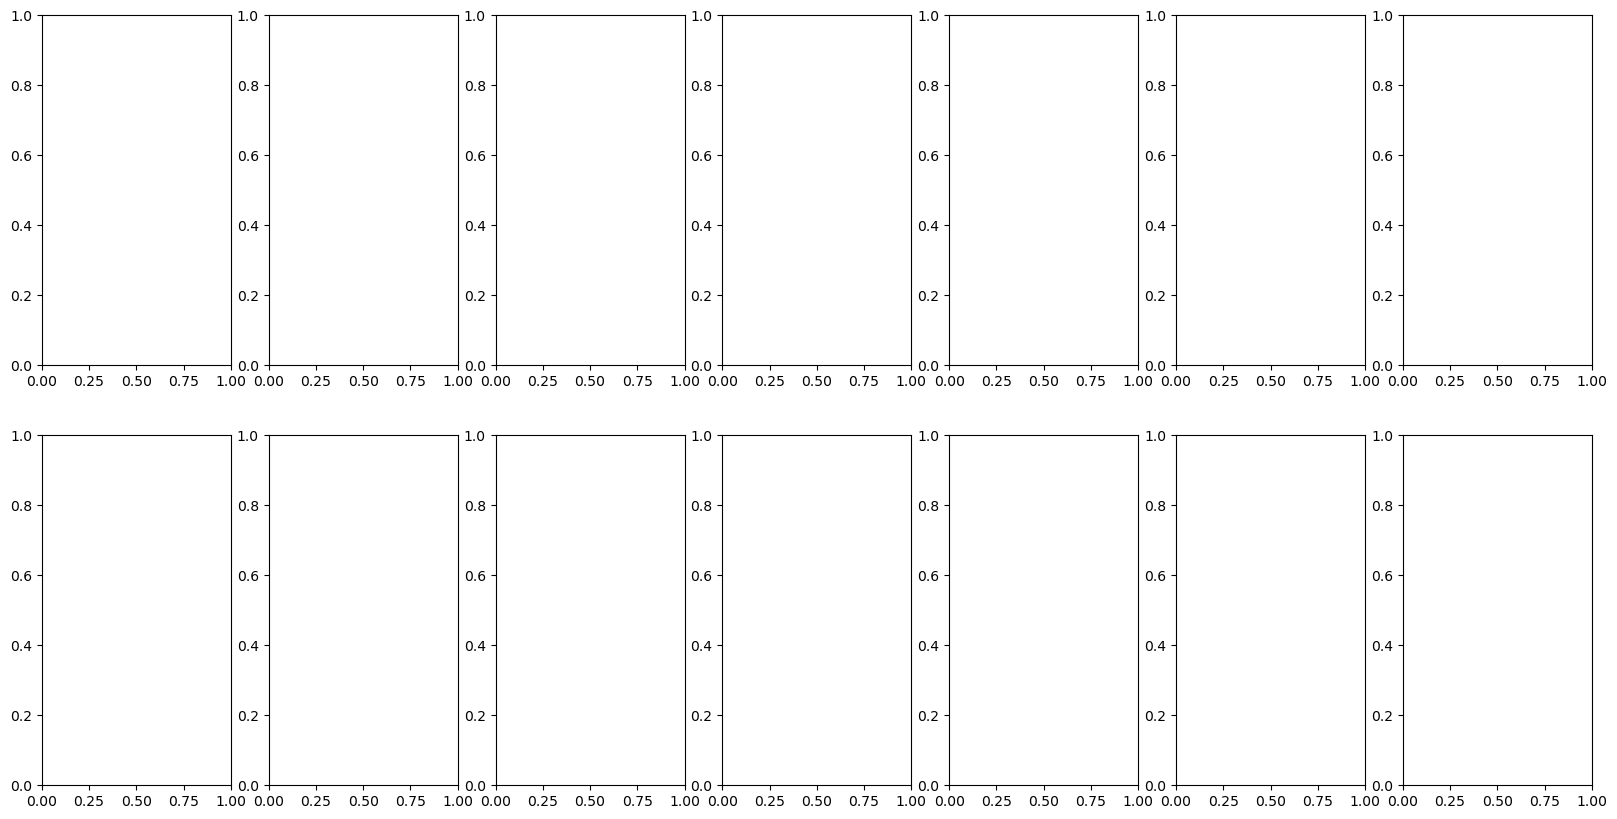

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for col,value in data.items():
    sns.boxplot(y=col, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [5]:
    for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
    

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [6]:
data = data[~(data['MEDV'] >= 50.0)]
data = data[~(data['CRIM'] >= 88.97)]
data = data[~(data['ZN'] >= 100.0)]
data = data[~(data['B'] >= 396.9)]
print(np.shape(data))

(368, 14)


In [7]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

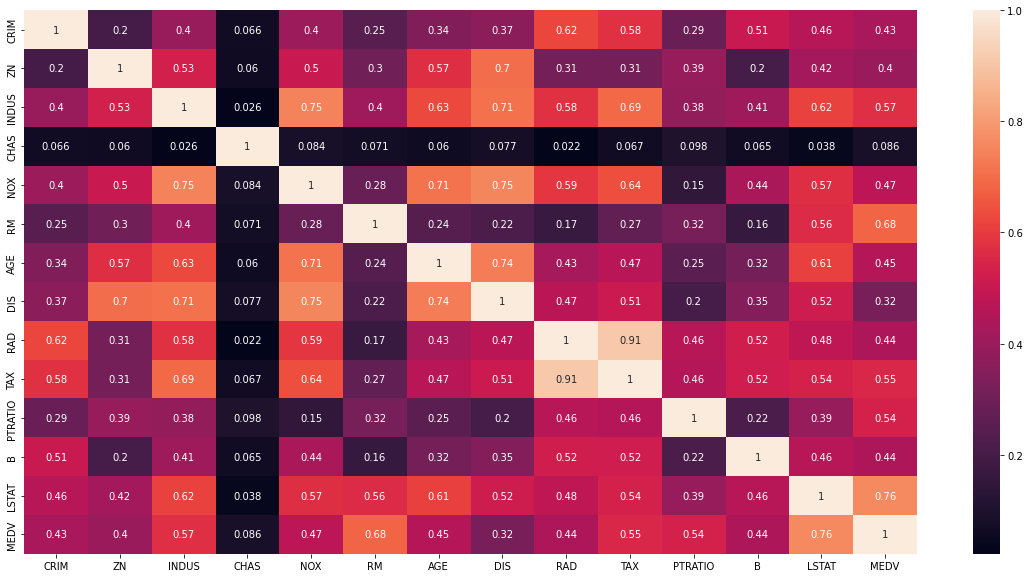

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)
plt.show()

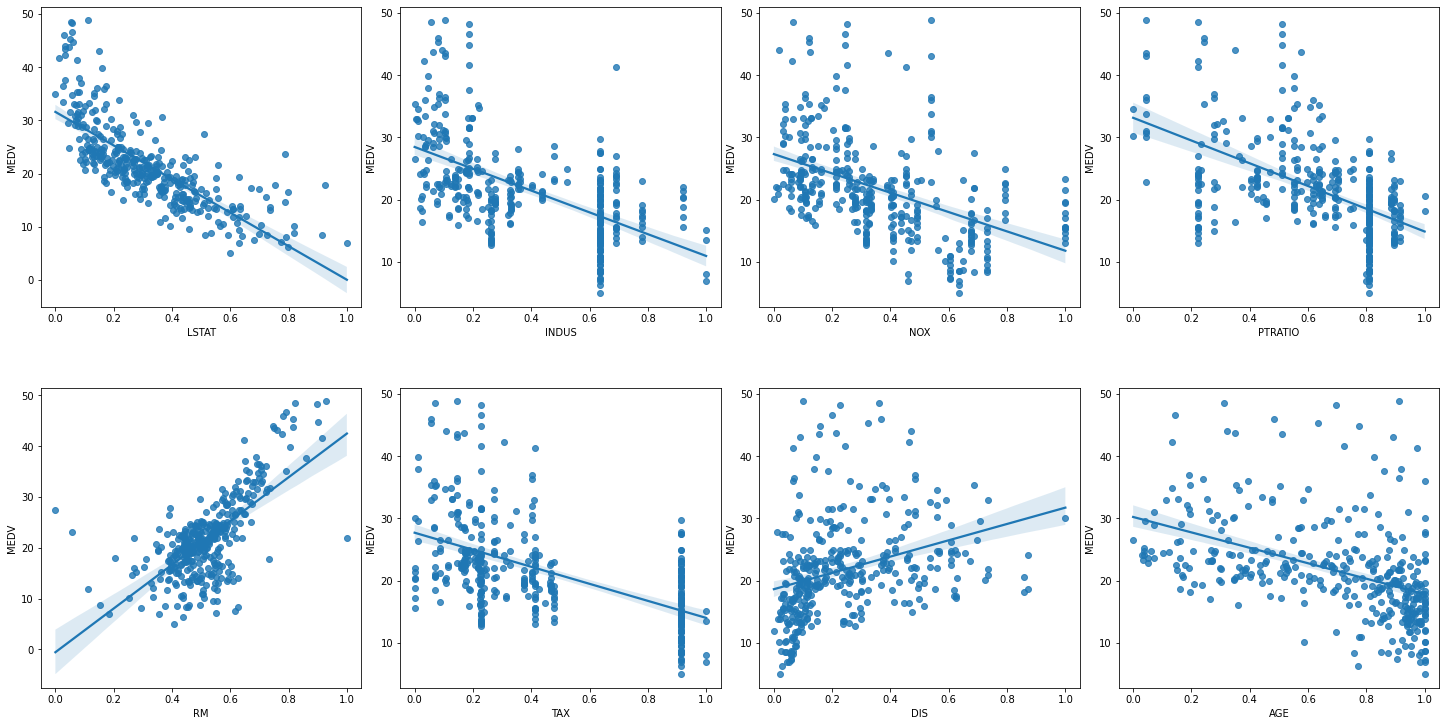

In [9]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [10]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [11]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import numpy as np


min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [12]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression()

In [13]:
i=0
for col in column_sels:
    print("The coefficient for {} is {}".format(col, linear_regression.coef_[i]))
    i=i+1

The coefficient for LSTAT is -0.9969873708794342
The coefficient for INDUS is -0.051198538820797224
The coefficient for NOX is -0.24815418408985263
The coefficient for PTRATIO is -0.2514385362765739
The coefficient for RM is 0.5475332811420701
The coefficient for TAX is -0.18487541003131597
The coefficient for DIS is -0.3638646444654972
The coefficient for AGE is 0.0526500472750072


In [14]:
linear_regression.score(X_train, y_train)

0.8036991954729169

In [15]:
print("R2-score: %5.4f"%(linear_regression.score(X_test, y_test)))

R2-score: 0.6562


In [16]:
from sklearn import metrics
predictions = linear_regression.predict(X_test)
print('MAE: %2.4f'%(metrics.mean_absolute_error(y_test, predictions)))
print('MSE:%2.4f'%(metrics.mean_squared_error(y_test, predictions)))
print('RMSE:%2.4f'%(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 0.1368
MSE:0.0354
RMSE:0.1881
